# Fry's Seven Stages of Visualization

**Stages**
1. Acquire
2. Parse
3. Filter
4. Mine
5. Represent
6. Refine
7. Interact

In [25]:
import pandas as pd

### 1. Acquire

In [26]:


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. Parse
- clean and organize data into structured format

In [28]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- clean the data
- keep only relevent columns

In [31]:
df = df.copy()
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
# Fill missing Age with median
# df['Age'].fillna(df['Age'].median(), inplace=True)

df['Age'] = df['Age'].fillna(df['Age'].median())
# Fill missing Embarked with mode

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [34]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


### 3. Filter

In [38]:
# Example: Filter only adult passengers
df_filtered = df[df['Age'] >= 18]

# Count by class
df_filtered['Pclass'].value_counts()


Pclass
3    413
1    204
2    161
Name: count, dtype: int64

### 4. Mine
- Discover patterns or relationship

In [40]:
# Survival rate by sex
df.groupby('Sex')['Survived'].mean()

# Survival rate by class
df.groupby('Pclass')['Survived'].mean()

# Correlation between numeric values
df[['Age', 'Fare', 'Survived']].corr()


,Age,Fare,Survived
Age,1.000000,0.096688,-0.064910
Fare,0.096688,1.000000,0.257307
Survived,-0.064910,0.257307,1.000000


### 5. Represent and 6 Refine
- visualize patterns
- in 6 we Polish our charts for clarity and aesthetics.



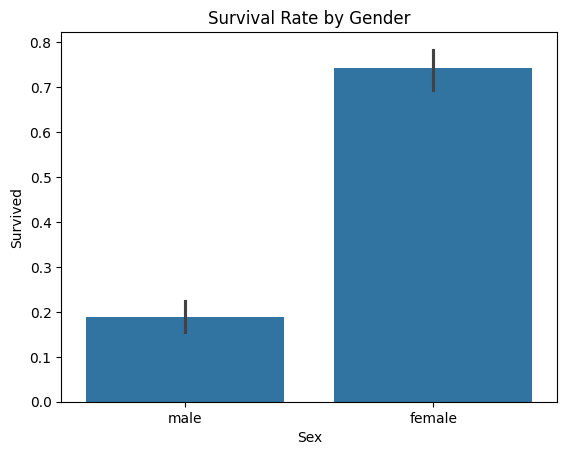

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


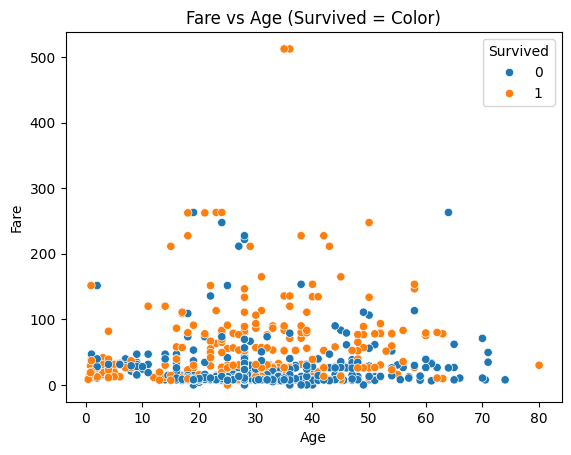

In [43]:
# B. Scatter Plot – Fare vs Age
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Fare vs Age (Survived = Color)")
plt.show()


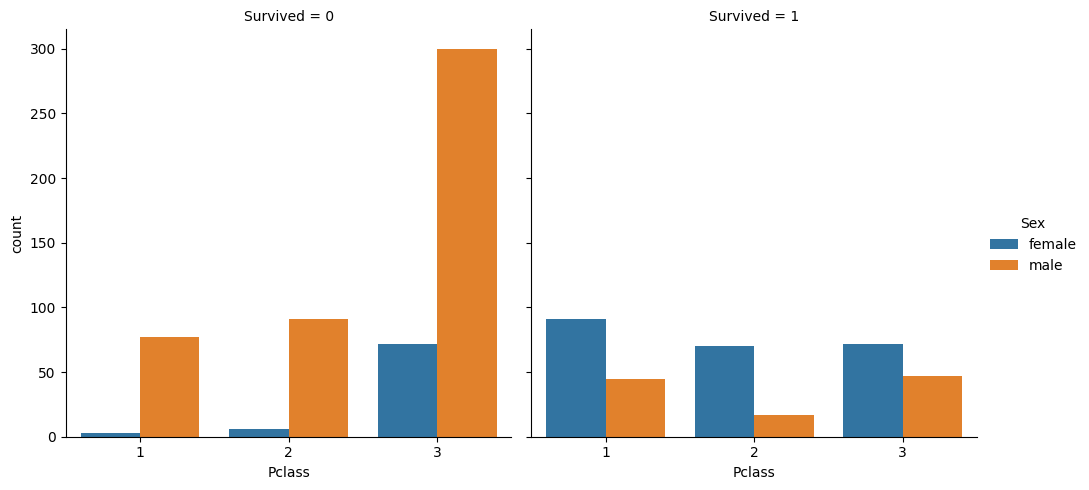

In [44]:
# C. Custom Plot – Survival by Class and Gender
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df)


### 7. Interact
- Allow users to explore data interactively.




In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown to select class
class_selector = widgets.Dropdown(
    options=[1, 2, 3],
    value=1,
    description='Pclass:'
)

# Function to show survival rate by gender for that class
def plot_class_gender(pclass):
    subset = df[df['Pclass'] == pclass]
    sns.barplot(x='Sex', y='Survived', data=subset)
    plt.title(f"Survival Rate for Class {pclass}")
    plt.show()

widgets.interact(plot_class_gender, pclass=class_selector)


interactive(children=(Dropdown(description='Pclass:', options=(1, 2, 3), value=1), Output()), _dom_classes=('w…

<function __main__.plot_class_gender(pclass)>